In [230]:
#import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [231]:
#read the file
df = pd.read_csv('Mall_Customers.csv')

In [232]:
#read the first five rows of the file
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA and cleaning

In [233]:
#drop the customer ID column since it won't be useful for our analysis
df.drop('CustomerID', axis=1, inplace=True)

In [234]:
#create a dictionary containing key-value pairs to convert the categorical gender col to numerical
dict_ = {'Male':1, 'Female':2}

In [235]:
#map the dict to the column
df.Gender = df.Gender.map(dict_)

In [236]:
#display the 1st five rows of the new df
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


In [237]:
#renaming the columns
df.columns = ['Gender','Age','Annual_Income','Spending_Score']

In [238]:
#preview
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


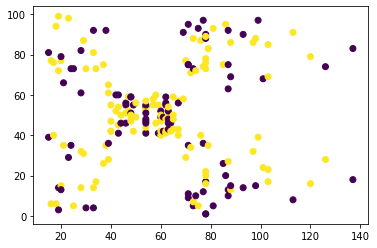

In [239]:
#visualize the 2 most important features grouped by gender
plt.scatter(df.Annual_Income, df.Spending_Score, c=df.Gender)

> ##### Display a box plot of the most important features to look for outliers because outliers can strongly affect how the clusters are created.

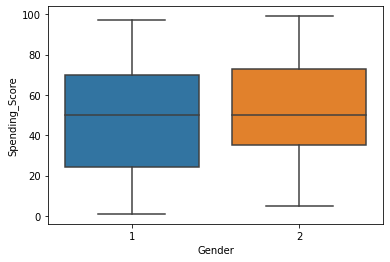

In [240]:
sns.boxplot(x = 'Gender', y ='Spending_Score', data=df);

<AxesSubplot:xlabel='Gender', ylabel='Annual_Income'>

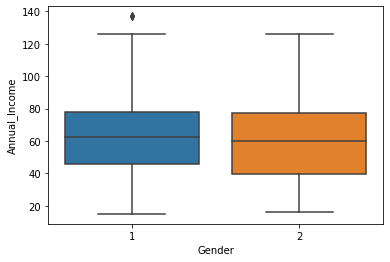

In [241]:
sns.boxplot(x='Gender',y='Annual_Income', data=df)

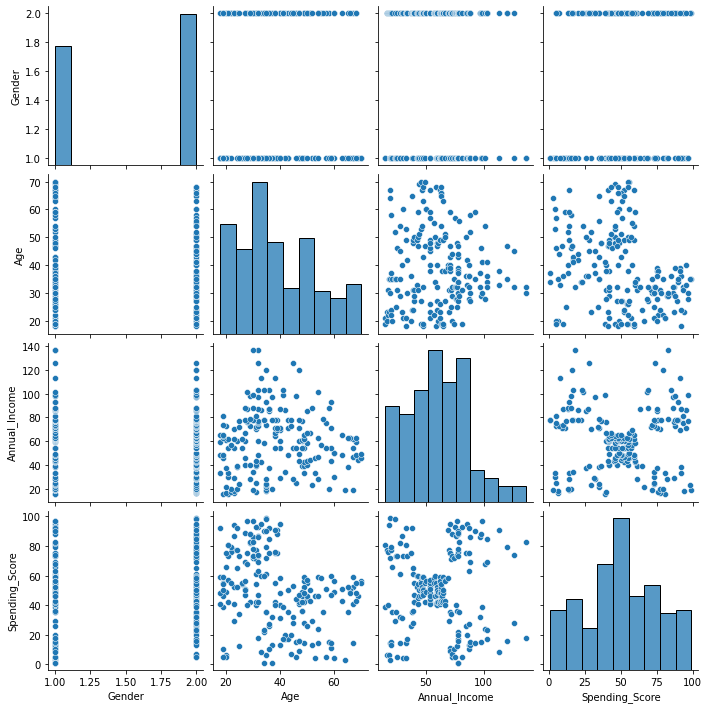

In [242]:
#display a pairplot to see how the features are correlated and the distribution of features seperately
sns.pairplot(df)

# KMeans Clustering
>##### Objective
>Find the right number of cluster for the customers based on the features provided.
Each point of the dataset is assigned to the nearest centroid of each cluster. 

##### 1. Feature scaling
>We need to normalize the data to make the training process less sensitive to the scale of the features. This also results in getting better coefficients after training.

In [243]:
#normalizing the df before clustering
from sklearn import preprocessing
d = preprocessing.normalize(df)
scaled_df = pd.DataFrame(d, columns=df.columns)
scaled_df.head()

,Gender,Age,Annual_Income,Spending_Score
0,0.021780,0.413826,0.326705,0.849433
1,0.011762,0.247008,0.176434,0.952743
2,0.075810,0.758098,0.606478,0.227429
3,0.024401,0.280613,0.195209,0.939444
4,0.037437,0.580276,0.318216,0.748743


In [244]:
from sklearn.cluster import KMeans

In [245]:
#elbow method to define the number of clusters to use
inertia = []
K_range = range(1,10)
for k in K_range:
    model = KMeans(n_clusters = k).fit(scaled_df)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Inertia')

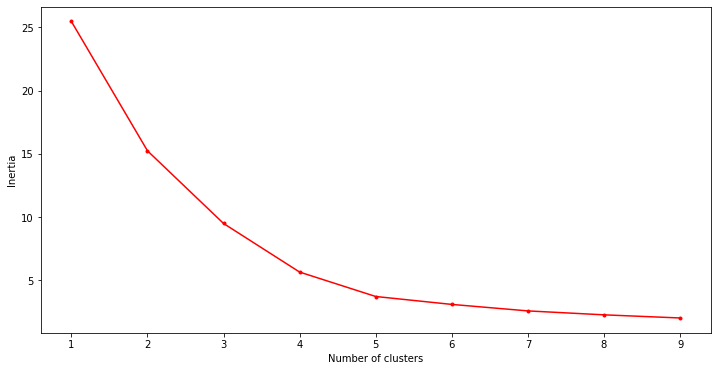

In [271]:
#plot the data points representting the elbows
plt.figure(figsize=(12,6))
plt.plot(K_range, inertia, marker='.', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [247]:
#instanciate the model with 5 clusters
model = KMeans(n_clusters = 5)

In [248]:
#fit the data to the model
model.fit(scaled_df)

KMeans(n_clusters=5)

In [249]:
#make predictions
model.predict(scaled_df)

array([3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 0, 3,
       4, 3, 4, 3, 0, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 0, 3,
       0, 3, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

### Visualize the 2 most important features along with the customers age ranges.

3.7192024870578875

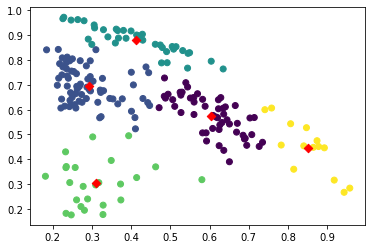

In [277]:
#Age and annual income
plt.scatter(scaled_df.iloc[:,1], scaled_df.iloc[:,2], c=model.predict(scaled_df))

#display the final position of our centroids
plt.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,2], marker='D', c='r')
model.inertia_

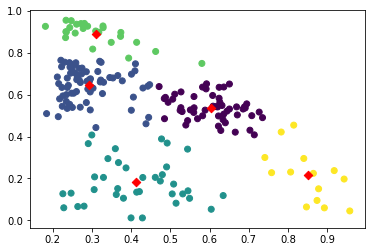

In [276]:
#Age and spending score
plt.scatter(scaled_df.iloc[:,1], scaled_df.iloc[:,3], c=model.predict(scaled_df))

#display the final position of our centroids
plt.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,3], marker='D', c='r')

Text(0.5, 1.03, '# of observations in each cluster')

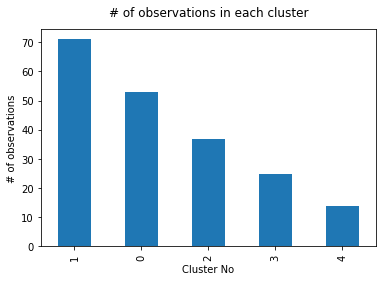

In [284]:
#compute how many observations are in each clusters
scaled_df['clusters'] = model.labels_
scaled_df.clusters.value_counts().plot(kind='bar')
plt.xlabel('Cluster No')
plt.ylabel('# of observations')
plt.title('# of observations in each cluster', y=1.03)

### Conclusion
>The KMeans clustering is a great tool when it comes to gather customers into groups in order to better meet their expectations. Based on the KMean clustering algo, we realized that the data collected on the customers, including their Age, Gender, Annual_Income and Spending score, they can be subdivised into 5 groups. Among these 5 groups, we can predict that group 1 will gather more customers then it's group 0, 2, 3 and 4, respectively.